In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
#data preprocessing and exploration
data.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [11]:
#check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

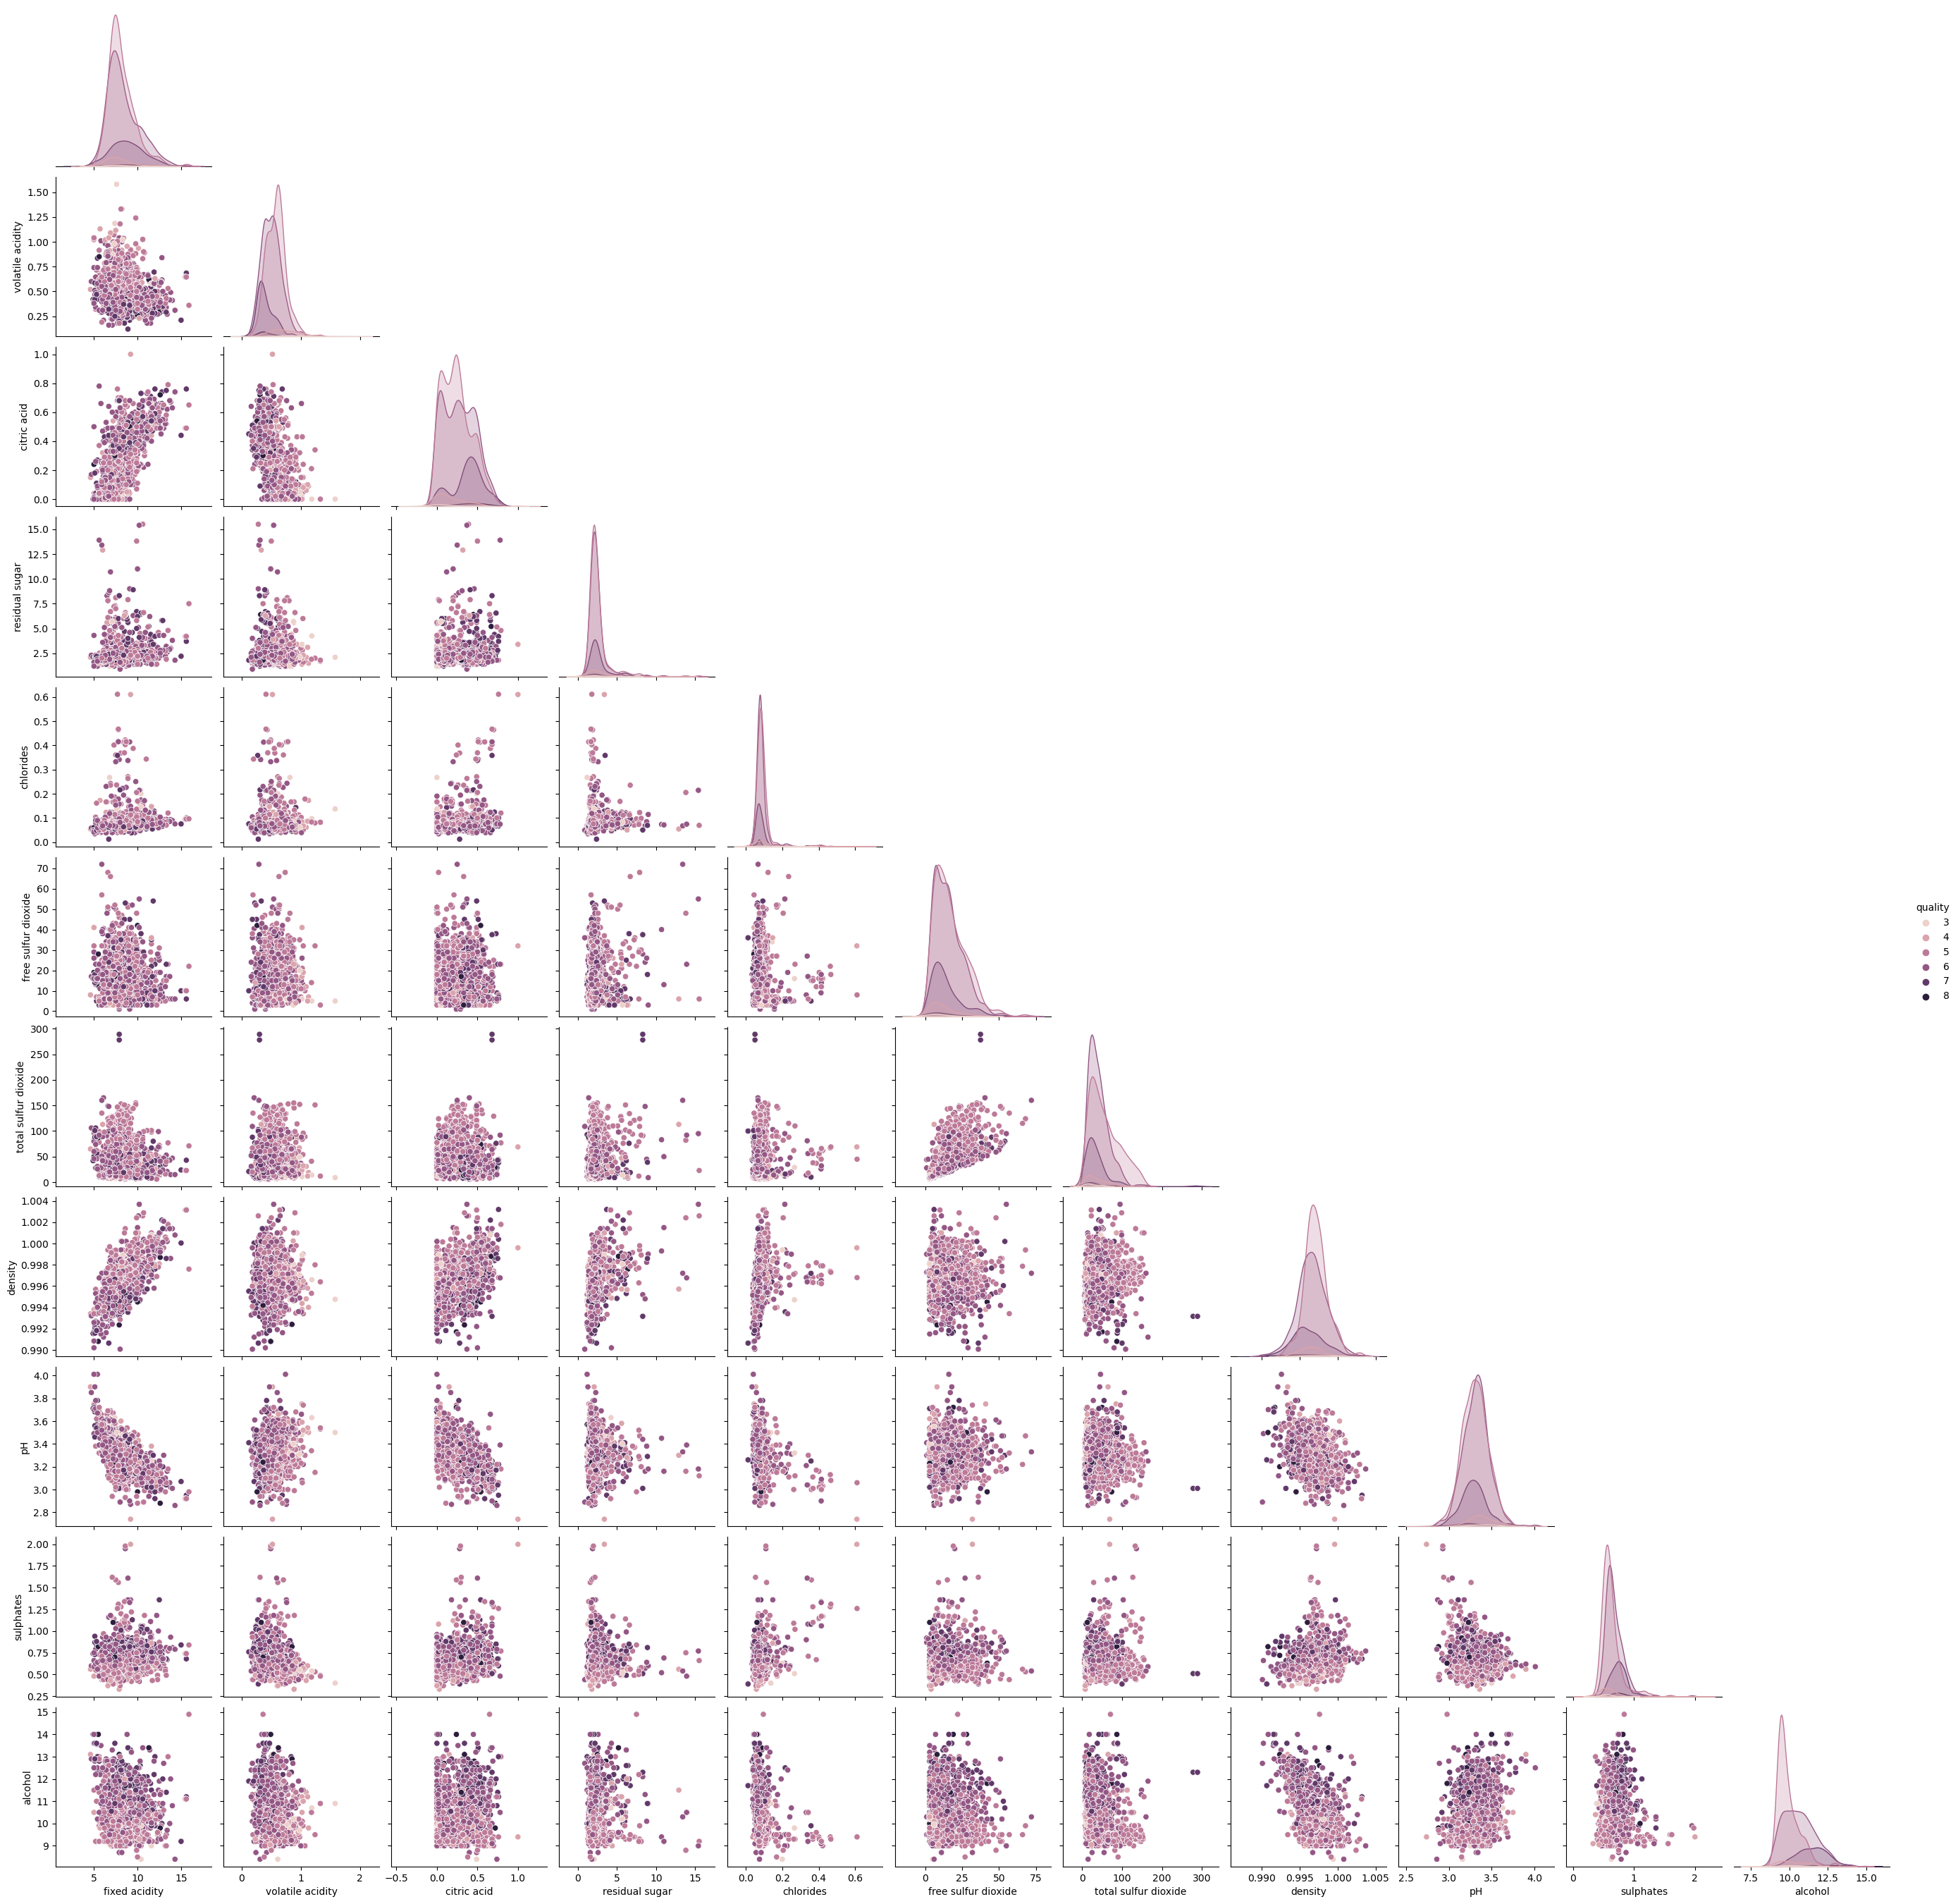

In [12]:
#Check at the feature distribution and relationships
sns.pairplot(data, hue='quality', corner=True)
plt.show()

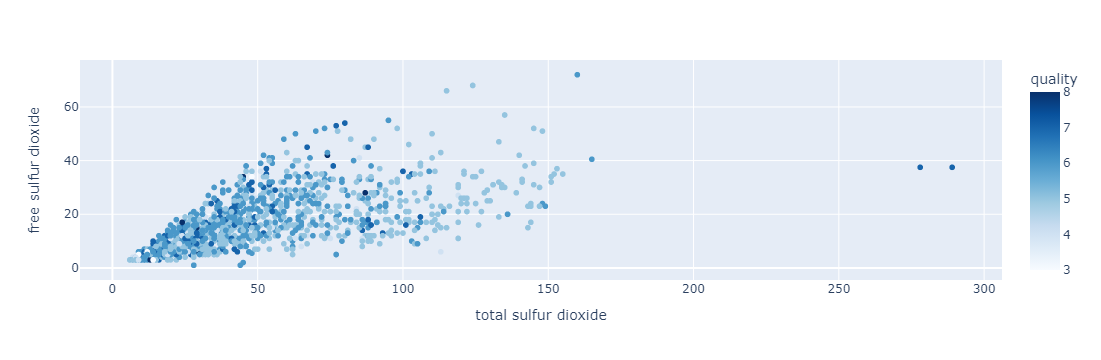

In [13]:
fig = px.scatter(data, x="total sulfur dioxide", y="free sulfur dioxide", color=data['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')

insights

1. Looks like higher levels of total sulfur dioxide means higher values of free sulfur dioxide
2. Low levels of free sulfur dioxide and total sulfur dioxide usually mean a better quality

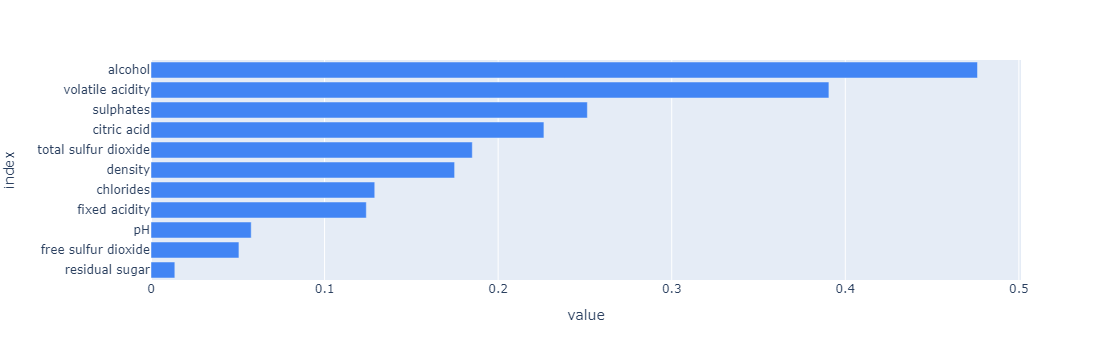

In [14]:
data_corr_bar = abs(data.corr()['quality']).sort_values()[:-1]
fig = px.bar(data_corr_bar, orientation='h', color_discrete_sequence =['#4285f4']*len(data_corr_bar))
fig.update_layout(showlegend=False)
fig.show()



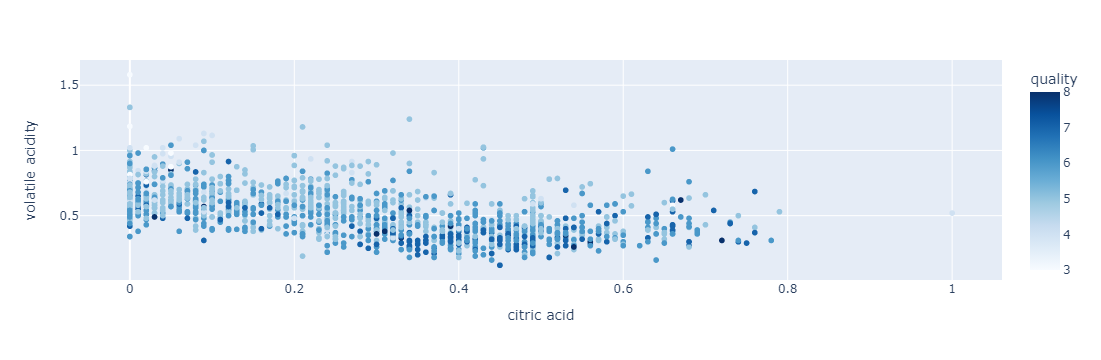

In [15]:
fig = px.scatter(data, x="citric acid", y="volatile acidity", color=data['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')

Insights
1.  citric acid and volatile acidity have an inverse relationship, i.e. high values of citric acid means low values of volatile acidity
2.   Low levels of volatile acidity usually means a better quality, as seen in the volatile acidity-quality Boxplot before

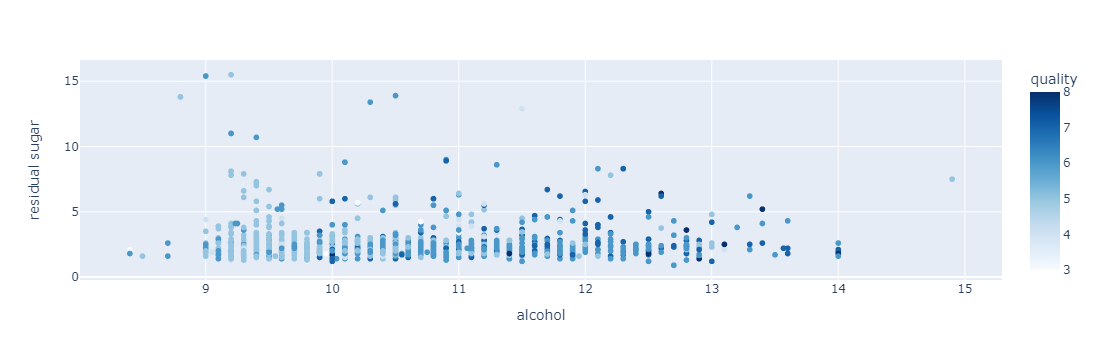

In [16]:
fig = px.scatter(data, x="alcohol", y="residual sugar", color=data['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')

Insights
1. The lower the alcohol and residual sugar, the higher the wine quality
2. higher or lower residual sugar than alcohol means a higher wine quality
   

Next, we perform model selection, training and evaluation. So, we will import all the necessary libraries

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


To train our model, we need our data to be in float. And from data.info(), we have column Quaklity as an int64. So, we will drop it before we train the model. 

In [18]:
X= data.drop('quality', axis=1)
y=data['quality']

In [19]:
#split the data set to training and testing

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [20]:
#scale the features

scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
#train and evaluate the model using logisticregression
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
prediction= logreg.predict (X_test)

#metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

logreg_metrics = evaluate(y_test, prediction)

print("Logistic Regression Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*logreg_metrics))


Logistic Regression Metrics - Accuracy: 0.5645833333333333, Precision: 0.5253065757465923, Recall: 0.5645833333333333, F1-score: 0.54012725727842


This is what the performance metrics in use mean

Accuracy: The proportion of correct predictions among the total number of instances.
Precision: The proportion of true positives among the instances predicted as positive.
Recall (Sensitivity): The proportion of true positives among the instances that are actually positive.
F1-score: The harmonic mean of precision and recalate.

In [22]:
#We also use Random forest to test our model

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_prediction=rf.predict(X_test)

#metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

rf_metrics = evaluate(y_test, rf_prediction)

print("RandomForest Regression Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*rf_metrics))



RandomForest Regression Metrics - Accuracy: 0.6625, Precision: 0.6332354253570898, Recall: 0.6625, F1-score: 0.6457281032883395


In [23]:
#we will also use support vector machines(SVM) to train our model

svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)

#metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

SVM_metrics = evaluate(y_test, svc_prediction)

print("SVM Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*SVM_metrics))

SVM Metrics - Accuracy: 0.60625, Precision: 0.5723558062937009, Recall: 0.60625, F1-score: 0.5792536090757506


From the three models selcted, Random Forest performed best followed by SVM, then logistic regression. Random Forest has the highest accuracy of 0.66

The next thing we are going to do is to optimize the models' performance by tuning their hyperparameters using techniques like grid search or random search.

In [24]:
#first we will train and evaluate our baseline model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Metrics
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

rf_metrics = evaluate(y_test, rf_preds)
print("Baseline Random Forest Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*rf_metrics))


Baseline Random Forest Metrics - Accuracy: 0.66875, Precision: 0.6420310429565959, Recall: 0.66875, F1-score: 0.6519154880979009


In [25]:
#Then, it performs hyperparameter tuning using Grid Search and retrains the optimized model, evaluating its performance to compare with the baseline.
from sklearn.model_selection import train_test_split, GridSearchCV
# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_



In [ ]:
#train and optimize the optimized model
rf_optimized = RandomForestClassifier(**best_params)
rf_optimized.fit(X_train, y_train)
rf_optimized_preds = rf_optimized.predict(X_test)

rf_optimized_metrics = evaluate(y_test, rf_optimized_preds)
print("Optimized Random Forest Metrics - Accuracy: {}, Precision: {}, Recall: {}, F1-score: {}".format(*rf_optimized_metrics))

After optimizing the models, we select the best model based on the chosen evaluation metrics, and present the final results, including the model's performance on the test dataset, feature importances or coefficients, and any insights derived from the analysis.

In [27]:
#lets identify the most important features in our model
important_features = pd.Series(rf_optimized.feature_importances_, index=X.columns)
important_features = important_features.sort_values(ascending=False)
print(important_features)

alcohol                 0.151690
sulphates               0.112588
total sulfur dioxide    0.104435
volatile acidity        0.102791
density                 0.091731
chlorides               0.079357
pH                      0.074075
residual sugar          0.072937
citric acid             0.072924
fixed acidity           0.072681
free sulfur dioxide     0.064790
dtype: float64


The top3 important features contributing to the wine quality are alcohol, suphates, and volatile acidity.